# Decision Tree

In [5]:
## # Load libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [6]:
# retrieve variables
%store -r raw_data
%store -r raw_data_uncorr

In [7]:
## devide train test tentative with stratification to keep the distribution
## raw_data parames [28] / raw_data_uncorr [24]
X = raw_data_uncorr.iloc[:,:24]
Y = raw_data_uncorr.iloc[:,24]

X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.35,
                                                   stratify=Y)

No Scaling needed for DecisionTreeClassifier.

In [8]:
## explore with default parameters
tree_clf = DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=20, n_jobs=-1, verbose=5)
'Accuracy media: {:0.3f}'.format(np.mean(tree_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    1.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.4s finished


'Accuracy media: 0.501'

In [9]:
## parameters' tuning

param_grid = [
    {'criterion': ['gini', 'entropy'],
     'splitter':['best', 'random'],
     'min_samples_leaf':[1,3,20],     
     'max_depth':[6,10,15],
     'random_state': [1,5,20]
    }
]

grid_search = GridSearchCV(estimator=tree_clf,
                           param_grid = param_grid,
                           cv = 10,
                           n_jobs=-1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=15,
                                              min_samples_leaf=3,
                                              random_state=20),
             n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [6, 10, 15],
                          'min_samples_leaf': [1, 3, 20],
                          'random_state': [1, 5, 20],
                          'splitter': ['best', 'random']}])

In [10]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 3,
 'random_state': 5,
 'splitter': 'best'}

In [11]:
grid_search.best_score_

0.4953846153846154

In [12]:
print('Best: {}'.format(grid_search.best_score_))
grid_search.best_estimator_

Best: 0.4953846153846154


DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       random_state=5)

In [13]:
results = grid_search.cv_results_

In [14]:
results = pd.DataFrame(results)[['mean_test_score','params']]
results.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
98,0.495385,"{'criterion': 'entropy', 'max_depth': 15, 'min..."
80,0.489231,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
90,0.489231,"{'criterion': 'entropy', 'max_depth': 15, 'min..."
94,0.487692,"{'criterion': 'entropy', 'max_depth': 15, 'min..."
96,0.481538,"{'criterion': 'entropy', 'max_depth': 15, 'min..."
...,...,...
69,0.378462,"{'criterion': 'entropy', 'max_depth': 6, 'min_..."
107,0.378462,"{'criterion': 'entropy', 'max_depth': 15, 'min..."
87,0.372308,"{'criterion': 'entropy', 'max_depth': 10, 'min..."
105,0.372308,"{'criterion': 'entropy', 'max_depth': 15, 'min..."


In [9]:
tree_clf = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=3, random_state=5, max_depth=15)
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=20, n_jobs=-1, verbose=5)
'Accuracy media: {:0.3f}'.format(np.mean(tree_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


'Accuracy media: 0.477'

In [10]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       random_state=5)

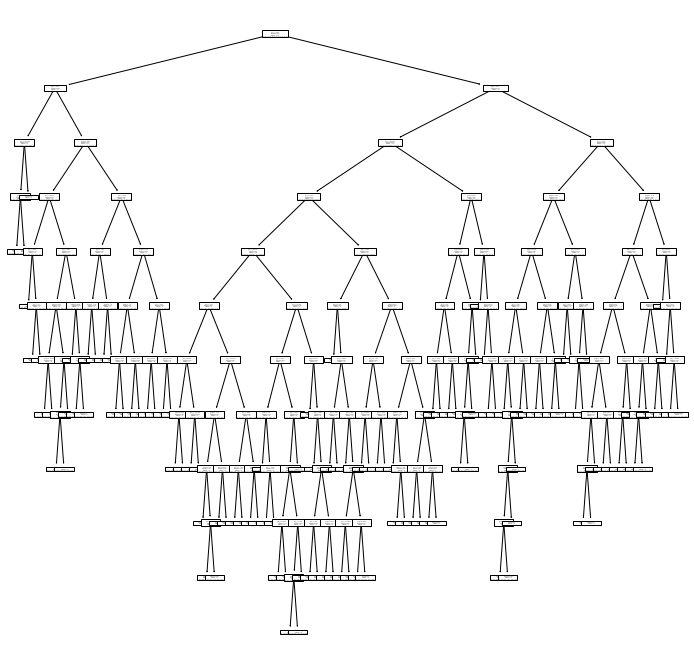

In [11]:
plt.figure(figsize=(12,12))
tree.plot_tree(tree_clf)
plt.savefig('plots/tree_high_dpi', dpi = 100)

In [12]:
expected = y_test
predicted = tree_clf.predict(X_test)
tree_cnf_matrix = confusion_matrix(expected, predicted)
tree_score_tuned = cross_val_score(tree_clf, X_test, y_test, cv = 10)
tree = 'Accuracy media tuned: {:0.3f}'.format(np.mean(tree_score_tuned))
tree

'Accuracy media tuned: 0.397'

In [13]:
## Micro-averaging - In micro-averaging method, you sum up the individual true positives, false positives, 
## and false negatives of the system for different sets and the apply them. And the micro-average F1-Score
## will be simply the harmonic mean of above two equations.
f1_score(expected, predicted, average = 'micro')

0.4257142857142857

In [14]:
## In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, 
## i.e., the fraction of the wrong labels to the total number of labels.
hamming_loss(expected, predicted)

0.5742857142857143

In [15]:
tree_accuracy = accuracy_score(expected, predicted)
tree_accuracy

0.4257142857142857

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

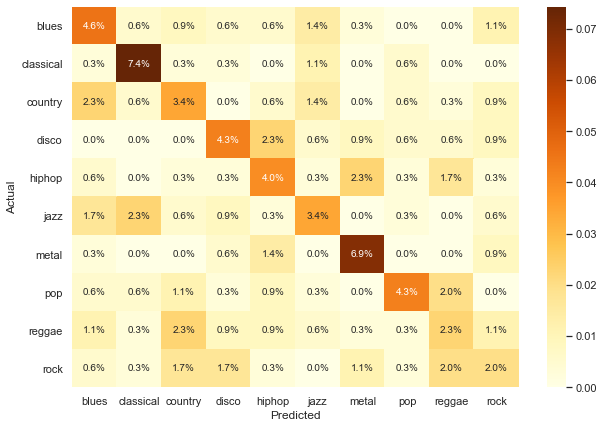

In [16]:
data = tree_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
tree_heatmap = sn.heatmap(df_cm/np.sum(data), cmap="YlOrBr", annot=True, fmt='.1%', annot_kws={"size": 10})# font size
tree_heatmap

In [17]:
## probability prediction over the test dataset showing the probability of belonging to specific class
pd.DataFrame(tree_clf.predict_proba(X_test), columns = tree_clf.classes_)

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,0.000000,0.0,0.0,0.750000,0.00,0.0,0.000000,0.0,0.25,0.0
1,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,1.00,0.0
2,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.00,1.0
3,0.000000,0.0,0.0,0.000000,0.75,0.0,0.000000,0.0,0.25,0.0
4,0.333333,0.0,0.0,0.666667,0.00,0.0,0.000000,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
345,0.000000,0.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.00,1.0
346,0.000000,0.0,0.0,0.000000,0.00,1.0,0.000000,0.0,0.00,0.0
347,0.333333,0.0,0.0,0.000000,0.00,0.0,0.666667,0.0,0.00,0.0
348,0.000000,1.0,0.0,0.000000,0.00,0.0,0.000000,0.0,0.00,0.0


In [18]:
%store tree
%store tree_accuracy
%store tree_cnf_matrix

Stored 'tree' (str)
Stored 'tree_accuracy' (float64)
Stored 'tree_cnf_matrix' (ndarray)
